# Imports

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Constants

##### Plot cosmetics

In [59]:
# text sizes
title_size = 28
axislabel_size = 24
axistick_size = 22
legendlabel_size = 22


# colors
p_black = np.array([60, 60, 60])/255.
p_gray = np.array([120, 120, 120])/255.
p_red = np.array([214, 95, 95])/255.
p_green = np.array([106, 204, 101])/255.
p_blue = np.array([72, 120, 207])/255.
p_yellow = np.array([196, 173, 102])/255.
p_purple = np.array([180, 124, 199])/255.

##### Physical constants

In [17]:


nm = 1e-9
um = 1000.*nm


pi = 3.14159     

e = 1.6e-19             # electron charge
k = 1.3806e-23          # boltzmann constant

T = 293                 # room temp Kelvin

epsilon_0 = 8.8542e-12  # permittivity free space
epsilon_r = 80          # relative susceptibility of water

N = 6.022e23



# 1. Electrical double layer

## theory

### constants

In [41]:
C_bulk = 100*N            # bulk ion concentration in ions/m^3
z_plus = 1              # positive ion charge/e
z_minus = -1            # negative ""  ""
zeta = -.02

In [42]:
x = np.linspace(0,10*nm, 1000)

lambda_D = (2*e**2*C_bulk/(epsilon_0*epsilon_r*k*T))**-.5

C_plus = C_bulk*(1-(e*z_plus)/(k*T)*zeta*np.exp(-x/lambda_D))
C_minus = C_bulk*(1+(e*z_plus)/(k*T)*zeta*np.exp(-x/lambda_D))

9.64011125275e-10


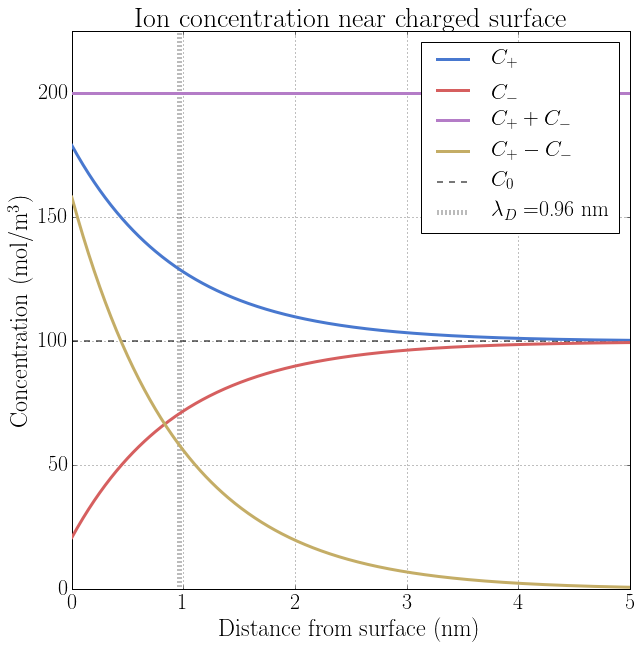

In [71]:
fig = plt.figure(figsize = (10,10))

plt.plot(x/nm, C_plus/N, color = p_blue, zorder = 3, lw = 3, label = r'$C_{+}$')
plt.plot(x/nm, C_minus/N, color = p_red, zorder = 3, lw = 3, label = r'$C_{-}$')
plt.plot(x/nm, (C_plus+C_minus)/N, color = p_purple, zorder = 3, lw = 3, label = r'$C_{+}+C_{-}$')
plt.plot(x/nm, (C_plus-C_minus)/N, color = p_yellow, zorder = 3, lw = 3, label = r'$C_{+}-C_{-}$')
plt.plot(x/nm, [C_bulk/N for i in range(x.shape[0])], ls = '--', color = p_gray, zorder = 2, lw = 2, label = r'$C_{0}$')
plt.plot([lambda_D/nm, lambda_D/nm], [-100, 500], ls = ':', color = p_gray, zorder = 2, lw = 5, label = r'$\lambda_{D}=$'+str(round(lambda_D/nm,2))+' nm')
plt.xlim(0, 5)
plt.ylim(0, 225)



plt.title('Ion concentration near charged surface', size = title_size)

plt.xlabel('Distance from surface (nm)', size = axislabel_size)
plt.ylabel('Concentration (mol/m$^{3}$)', size = axislabel_size)

plt.legend(fontsize = legendlabel_size)

plt.tick_params(labelsize = axistick_size)
plt.grid()

plt.savefig('charge_concentration_dh.png', dpi = 300)

plt.show()

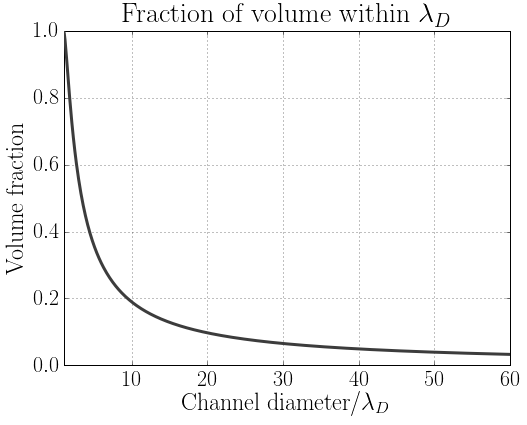

In [89]:
fig = plt.figure(figsize = (8,6))
r = np.linspace(1,1000,10000)
lambda_D = 1
plt.plot(r/lambda_D, 2*lambda_D/r-(lambda_D/r)**2., lw = 3, color = p_black, zorder = 3)
plt.xlim(1,60)
plt.ylim(0,1)

plt.title('Fraction of volume within $\lambda_{D}$', size = title_size)
plt.xlabel('Channel diameter/$\lambda_{D}$', size = axislabel_size)
plt.ylabel('Volume fraction', size = axislabel_size)

plt.grid()
plt.tick_params(labelsize = axistick_size)

plt.savefig('fraction_within_EDL.png', dpi = 300)

plt.show()

## COMSOL

In [91]:
file_directory = './EDL/'
C_K_file_name = 'EDL_CK.txt'
C_Cl_file_name = 'EDL_CCl.txt'
C_K_plus_Cl_file_name = 'EDL_CKplusCCl.txt'
C_K_minus_Cl_file_name = 'EDL_CKminusCCl.txt'

In [93]:
file_handle = open(file_directory + C_K_file_name, 'r')
file_contents = file_handle.read()

In [94]:
print file_contents

% Model:              EDL.mph
% Version:            COMSOL 4.4.0.248
% Date:               Nov 6 2016, 17:30
% Dimension:          1
% Nodes:              1448
% Expressions:        1
% Description:        Line graph
% r                       Height
0                         3.5797445056257335
4.189289780832979E-11     3.5799329708049257
8.378579561665958E-11     3.5801214359841174
1.2567869342498936E-10    3.580309901163309
1.6757159123331916E-10    3.580498366342501
2.0946448904164892E-10    3.580686831521693
2.5574492353830083E-10    3.58121589458578
3.020253580349527E-10     3.5817449576498657
3.483057925316046E-10     3.5822740207139523
3.945862270282565E-10     3.582803083778039
4.4086666152490835E-10    3.583332146842125
4.919941500333006E-10     3.584330948995694
5.431216385416927E-10     3.5853297511492626
5.942491270500851E-10     3.5863285533028315
6.453766155584772E-10     3.5873273554564
6.965041040668695E-10     3.588326157609969
7.529862889122908E-10     3.58995079541955

# 2. Electroosmosis